In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Activation,Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical  
import numpy as np   #行列計算
import matplotlib.pyplot as plt  #グラフ
%matplotlib inline

In [ ]:
#データセットの準備  (0~9までの手書き数字)MNISTを４種類の配列に読み込む
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
#データセットのシェイプ(size)の確認  機械学習
print(train_images.shape)  #28*28ピクセル   データを学習させる
print(train_labels.shape)
print(test_images.shape)  #学習したデータを答え合わせ  
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


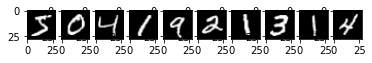

In [ ]:
#データセットの画像の確認
for i in range(10):
  plt.subplot(1,10,i+1)  #行列　プロットの位置
  plt.imshow(train_images[i],'gray')  #イメージとカラーマップ
plt.show()

In [ ]:
print(train_labels[0:10])

[5 0 4 1 9 2 1 3 1 4]


In [ ]:
#データセットの画像の前処理　確認  reshape(縦に並べる1*8)
train_images=train_images.reshape((train_images.shape[0],784))
test_images=test_images.reshape((test_images.shape[0],784))


print(train_images.shape)    
print(test_images.shape)

(60000, 784)
(10000, 784)


In [ ]:
#データセットのラベルの前処理 確認  
train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)

print(train_labels.shape)
print(test_labels.shape)

(60000, 10)
(10000, 10)


In [ ]:
#モデルの作成   
model=Sequential()  #全部結合する Dense
model.add(Dense(256,activation='sigmoid',input_shape=(784,)))  #入力層784  中間層256
model.add(Dense(128,activation='sigmoid'))  #隠れ層  中間層128
model.add(Dropout(rate=0.5))  #ドロップアウト  線をランダムに抜くこと
model.add(Dense(10,activation='softmax')) #出力層 10 活性化関数 softmax　出力は確率になるように

In [ ]:
#コンパイル
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=0.1),metrics=['acc'])  #活性化関数はsoftmax 損失はcrossentropy testに対してどうやって正確さを測るかmetrics

In [ ]:
#学習
history=model.fit(train_images,train_labels,batch_size=500,
                  epochs=2,validation_split=0.5)

Epoch 1/2
60/60 [==============================] - 1s 22ms/step - loss: 1.9336 - acc: 0.3448 - val_loss: 1.3375 - val_acc: 0.7908
Epoch 2/2
60/60 [==============================] - 1s 20ms/step - loss: 1.2385 - acc: 0.6362 - val_loss: 0.8796 - val_acc: 0.8399


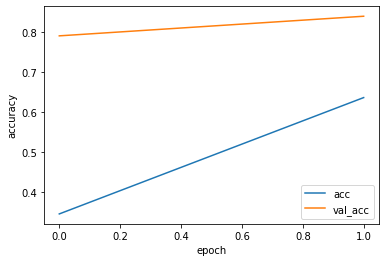

In [ ]:
#グラフの表示
plt.plot(history.history['acc'],label='acc') #テストデータに対するaccuracy
plt.plot(history.history['val_acc'],label='val_acc')   #訓練データ
plt.ylabel('accuracy')  
plt.xlabel('epoch') #あまり増やしてもダメ
plt.legend(loc='best')
plt.show()

In [ ]:
#評価
test_loss,test_acc=model.evaluate(test_images,test_labels)
print('loss:{:.3f}\nacc:{:.3f}'.format(test_loss,test_acc))  #評価がテストデータ

313/313 [==============================] - 0s 2ms/step - loss: 0.8642 - acc: 0.8458
loss:0.864
acc:0.846


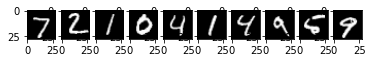

[7 2 1 0 4 1 4 9 6 9]


In [ ]:
#推論する画像の表示
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.imshow(test_images[i].reshape((28,28)),'gray')
plt.show()

#推論したラベルの表示
test_predictions=model.predict(test_images[0:10])
test_predictions=np.argmax(test_predictions,axis=1)
print(test_predictions)

In [ ]:
#回帰  数値を予測するタスク  パッケージのインポート  住宅情報のデータセット
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.layers import Activation,Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import pandas as pd  #データ分析を行う
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#データセットの準備   ４種類の配列に読み込む
(train_data,train_labels),(test_data,test_labels)=boston_housing.load_data()

In [ ]:
#訓練データと訓練ラベルは404件、テスト画像とテストラベルは102件  13はBoston house-pricesの特徴の数
print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
print(test_labels.shape)

(404, 13)
(404,)
(102, 13)
(102,)


In [ ]:
#データセットのデータの確認 先頭10件の訓練データの確認を行う。pandsを使ってデータセットの内容をテーブル形式で出力。
#
column_names=['CRIM','ZM','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
df=pd.DataFrame(train_data,columns=column_names)  #データ型、リスト
df.head()  #テーブル形式で出力

,CRIM,ZM,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


In [ ]:
#データセットのラベルの確認  先頭10件の訓練ラベルの確認を行う
print(train_labels[0:10])

[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4]


In [ ]:
#データセットのシャッフルの前処理  訓練データと訓練ラベルのシャッフルを行う 
#学習させる時に似たデータを連続して学習すると偏りが生じるため
order=np.argsort(np.random.random(train_labels.shape))  #データ件数分の連続一様分布の乱数を作成
train_data=train_data[order] #訓練データ
train_labels=train_labels[order] #訓練ラベル

In [ ]:
#訓練データとテストデータの正規化の前処理  std　標準偏差　mean 平均
#正規化とはデータを一定の方法で変形し、次元が違うものを同じ単位で比較しやすくすること
#今回は平均０、分散１に正規化 
mean=train_data.mean(axis=0)
std=train_data.std(axis=0)
train_data=(train_data-mean)/std
test_data=(test_data-mean)/std

In [ ]:
#データセットの前処理後のデータの確認
column_names=['CRIM','ZM','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
df=pd.DataFrame(train_data,columns=column_names)
df.head()

,CRIM,ZM,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.795542,-0.483615,1.028326,-0.256833,1.371293,0.203014,1.110488,-0.927835,1.675886,1.565287,0.784476,-0.383354,0.314563
1,-0.391416,-0.483615,-0.374023,-0.256833,-0.318879,-0.586933,0.992234,-0.805529,-0.511142,-0.131785,1.102997,0.417756,0.514685
2,-0.362226,-0.483615,-0.177047,-0.256833,-0.114009,0.162106,-0.064884,-0.102466,-0.626249,-0.613224,-0.034578,0.430097,-0.328590
3,-0.231035,-0.483615,-0.435762,-0.256833,-0.165227,-0.241331,0.999401,0.009631,-0.626249,-0.595170,1.148500,-1.132758,1.048805
4,0.874086,-0.483615,1.028326,-0.256833,1.371293,0.785600,0.268377,-0.959841,1.675886,1.565287,0.784476,-3.259051,1.380043


In [ ]:
#ニューラルネットワークのモデル作成   全結合層を３つ重ねたモデル 神経細胞を数学的にモデル化したことをユニット
model=Sequential()  #層を積み重ねたもの  
model.add(Dense(64,activation='relu',input_shape=(13,)))  #ユニット*64 ReLU()
model.add(Dense(64,activation='relu')) #ユニット*64 ReLU()
model.add(Dense(1)) #ユニット*1

In [ ]:
#ニューラルネットワークのモデルのコンパイル　損失回数 mse 最適化関数　Adam 評価指数　mae
#mseは平均２乗誤差 実際の値と予測値との誤差の２乗を平均したもの
model.compile(loss='mse',optimizer=Adam(lr=0.001),metrics=['mae'])

In [ ]:
#EarlyStoppingの準備  これはコールバック関数  1エポック毎に何らかの処理を実行する
early_stop=EarlyStopping(monitor='val_loss',patience=20) #str型 監視する値 int型 ここで指定したエポック数間に改善がないと学習停止

In [ ]:
#学習  実行時にはcallbaksにEarlyStoppingを追加
#loss　訓練データの誤差 0に近いほど良い   コンパイルの損失関数
#mean_absolute_error 訓練データの平均絶対誤差　０に近いほど良い 評価指数
#val_loss 検証データの誤差　0に近いほど良い　 コンパイルの損失関数
#val_mean_absolute_error 検証データの平均絶対誤差　0に近いほど良い 評価指数
history=model.fit(train_data,train_labels,epochs=600,validation_split=0.5,callbacks=[early_stop]) #splitはデータの最後にどのくらいの検証に使われるかを表現

Epoch 1/600
7/7 [==============================] - 0s 18ms/step - loss: 558.6207 - mae: 21.7242 - val_loss: 553.7307 - val_mae: 21.8440
Epoch 2/600
7/7 [==============================] - 0s 5ms/step - loss: 529.8904 - mae: 21.0741 - val_loss: 522.5217 - val_mae: 21.1533
Epoch 3/600
7/7 [==============================] - 0s 5ms/step - loss: 500.1108 - mae: 20.3979 - val_loss: 488.6565 - val_mae: 20.3777
Epoch 4/600
7/7 [==============================] - 0s 4ms/step - loss: 467.8806 - mae: 19.6135 - val_loss: 448.8232 - val_mae: 19.4355
Epoch 5/600
7/7 [==============================] - 0s 4ms/step - loss: 429.1472 - mae: 18.6493 - val_loss: 402.9917 - val_mae: 18.2879
Epoch 6/600
7/7 [==============================] - 0s 4ms/step - loss: 383.8784 - mae: 17.4981 - val_loss: 350.7312 - val_mae: 16.8967
Epoch 7/600
7/7 [==============================] - 0s 4ms/step - loss: 331.3546 - mae: 16.0573 - val_loss: 293.7714 - val_mae: 15.2235
Epoch 8/600
7/7 [==============================] - 0s 

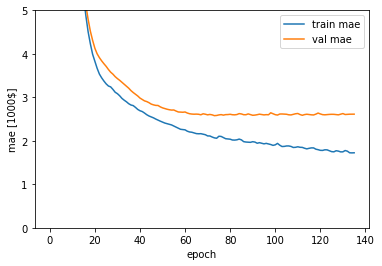

In [ ]:
#グラフの表示 historyとはfit()の戻り値   上の情報をグラフ化
plt.plot(history.history['mae'],label='train mae')
plt.plot(history.history['val_mae'],label='val mae')
plt.xlabel('epoch')
plt.ylabel('mae [1000$]')
plt.legend(loc='best')
plt.ylim([0,5])
plt.show()

In [ ]:
#テスト画像とテストラベルの配列をモデルに渡して評価を実行し、平均絶対誤差を取得する。

test_loss,test_mae=model.evaluate(test_data,test_labels)
print('loss:{:.3f}\nmae:{:.3f}' .format(test_loss,test_mae))

4/4 [==============================] - 0s 2ms/step - loss: 23.2729 - mae: 3.1622
loss:23.273
mae:3.162


In [ ]:
#最後に先頭10件のテストデータの推論を行い、予測結果を取得する
print(np.round(test_labels[0:10]))

#推論した値段の表示  
test_predictions=model.predict(test_data[0:10]).flatten()  #出力は2次元配列のためflatten()で１次元配列
print(np.round(test_predictions))

[ 7. 19. 19. 27. 22. 24. 31. 23. 20. 23.]
[ 6. 18. 21. 37. 24. 18. 24. 21. 20. 23.]


3-3章

In [ ]:
#畳み込みニューラルネットワークで必要なパッケージのインポート　
from tensorflow.keras. datasets import cifar10
from tensorflow.keras. layers import Activation,Dense,Dropout,Conv2D,Flatten,MaxPool2D
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#データセット[CIFAR-10]を4種類の配列に読み込む
(train_images,train_labels),(test_images,test_labels)=cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [ ]:
#訓練データと訓練ラベルは50000件 テスト画像とテストラベルは10000件
#データセットのシェイプの確認  RGB画像だから✖️3がついている
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


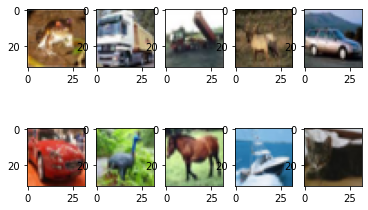

In [ ]:
#データセットの画像の確認
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(train_images[i])
plt.show()

In [ ]:
#データセットのラベルの確認
print(train_labels[0:10])

[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]


In [ ]:
#データセットの画像の前処理
train_images=train_images.astype('float32')/255.0
test_images=test_images.astype('float32')/255.0

#データセットの画像の前処理後のシェイプの確認
print(train_images.shape)
print(test_images.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
#データセットのラベルの前処理  
#訓練ラベルとテストラベルの配列の要素であるラベルはone-hot表現に変換
train_labels=to_categorical(train_labels,10)
test_labels=to_categorical(test_labels,10)

#データセットのラベルの前処理後のシェイプの確認
print(train_labels.shape)
print(test_labels.shape)

(50000, 10)
(10000, 10)


In [ ]:
#モデルの作成
model=Sequential()

#Conv→Conv→Pool→Dropout
model.add(Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(32,32,3)))
model.add((MaxPool2D(pool_size=(2,2))))
model.add(Dropout(0.25))

#conv conv pool Dropout
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#Flatten Dense Dropout Dense
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

In [ ]:
#CNNのコンパイル
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['acc'])

In [ ]:
#訓練画像、訓練ラベルの配列をモデルに渡して学習を開始する
history=model.fit(train_images,train_labels,batch_size=128,epochs=20,validation_split=0.1)

Epoch 1/20
352/352 [==============================] - 158s 448ms/step - loss: 1.6696 - acc: 0.3880 - val_loss: 1.3152 - val_acc: 0.5244
Epoch 2/20
352/352 [==============================] - 153s 434ms/step - loss: 1.2853 - acc: 0.5383 - val_loss: 1.0978 - val_acc: 0.6000
Epoch 3/20
352/352 [==============================] - 152s 433ms/step - loss: 1.1322 - acc: 0.5975 - val_loss: 0.9573 - val_acc: 0.6608
Epoch 4/20
352/352 [==============================] - 153s 434ms/step - loss: 1.0249 - acc: 0.6373 - val_loss: 0.9479 - val_acc: 0.6650
Epoch 5/20
352/352 [==============================] - 155s 440ms/step - loss: 0.9472 - acc: 0.6622 - val_loss: 0.9270 - val_acc: 0.6700
Epoch 6/20
352/352 [==============================] - 152s 431ms/step - loss: 0.8904 - acc: 0.6849 - val_loss: 0.8096 - val_acc: 0.7154
Epoch 7/20
352/352 [==============================] - 152s 431ms/step - loss: 0.8389 - acc: 0.7047 - val_loss: 0.8187 - val_acc: 0.7136
Epoch 8/20
352/352 [============================

In [ ]:
#モデルの保存
model.save('convolution.h5')

In [ ]:
#ファイルからモデルを読み込む
model=load_model('convolution.h5')

In [ ]:
#グラフの表示
plt.plot(history.history['acc'],label='acc')
plt.plot(history.history['val_acc'],label='val_acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.show()



In [ ]:
#評価  テスト画像、ラベルの配列をモデルに渡して評価を実行し、正解率を取得する
test_loss,test_acc=model.evaluate(test_images,test_labels)
print('loss:{:.3f}\nacc: {:.3f}'.format(test_loss,test_acc))

In [ ]:
#先頭１０件のテスト画像を表示
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(test_images[i])
plt.show()

#推論したラベルの表示
test_predictions=model.predict(test_images[0:10])
test_predictions=np.argmax(test_predictions,axis=1)
labels=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
print(labels[n] for n in test_predictions)


In [ ]:
#コンパイル
tpu_model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),
metrics=['acc'])

#学習
history=tpu_model.fit(train_images,train_labels,batch_size=128,
        epochs=20,validation_split=0.1)

#モデルの保存
tpu_model.save('convolution.h5')

#評価
test_loss,test_acc=tpu_model.evaluate(test_images,test_labels)
print('loss:{:.3f}\nacc:{:.3f}'.format(test_loss,test_acc))

In [ ]:
#推論する画像の表示
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(test_images[i])
plt.show()

#推論したラベルの表示   学習データ数を１６個に増やして推論し、結果の先頭10個のみ取得して利用
test_predictions=tpu_model.predict(test_images[0:16]) #学習データ数を16個に増やす
test_predictions=np.argmax(test_predictions,axis=1)[0:10]) #結果数を10個に減らす
labels=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
print([labels[n] for n in test_predictions])